# 2 Automatic Modulation Classification: Deep Learning Baseline

In this notebook we will go over some PyTorch basics and build a neural network to classify the same data we had for the ML baseline.

## Dependencies

NumPy and Matplotlib are still our everlasting friends, additionally we import PyTorch and some useful modules like nn for neural network layers and optim for optimizers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import torch

import torch.nn as nn
from torch import optim
import torch.nn.functional as F

from ml_helpers import *
from comms_helpers import *

In [2]:
# train_snr = np.arange(-9,16,2)

# train_loader = gen_loader(num_frames=512, snr=train_snr, batch_size=32)
# val_loader = gen_loader(num_frames=128, snr=train_snr, batch_size=32)

# dataset = {'train_loader': train_loader,
#            'val_loader': val_loader}

# torch.save(dataset, f"data/amc_data_512.pt")

In [2]:
baseline = torch.load(f'baselines/results/amc_baseline.pt')

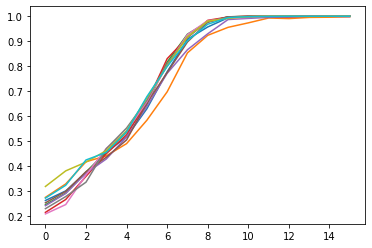

In [3]:
for result in torch.load(f'baselines/results/amc_baseline.pt'):
    plt.plot(result['accs_mod'])

In [4]:
all_loss_ratios = []
for i in range(1,10):
    models = []

    amc_weight = 1
    snr_weight = round(1 - i*0.1, 1)
    
    loss_ratios = (amc_weight, snr_weight)
    
    all_loss_ratios.append(loss_ratios)

FileNotFoundError: [Errno 2] No such file or directory: 'models/case_1/amc_1_0.9.pt'

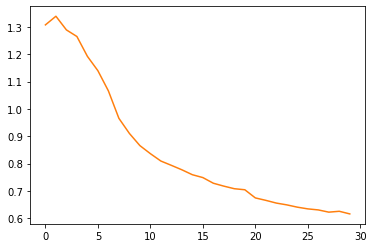

In [5]:
for i, loss_ratios in enumerate(all_loss_ratios):
    configs = torch.load(f'models/case_0/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')
#     plt.plot(np.mean([config['losses_snr'] for config in configs], axis=0), f'C{i}')
    plt.plot(np.mean([config['losses_mod'] for config in configs], axis=0), f'C1')
    
    configs = torch.load(f'models/case_1/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')
    plt.plot(np.mean([config['losses_mod'] for config in configs], axis=0), f'C2--')
    
    configs = torch.load(f'models/case_2/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')
    plt.plot(np.mean([config['losses_mod'] for config in configs], axis=0), f'C3--')
    
configs = torch.load(f'baselines/models/amc_baseline.pt')
# plt.plot(np.mean([config['losses'] for config in configs], axis=0), f'C3-x')
plt.plot(np.mean([config['losses'] for config in configs], axis=0), f'C4--x')
# plt.ylim([0,1])
plt.grid()
# plt.legend(all_loss_ratios)

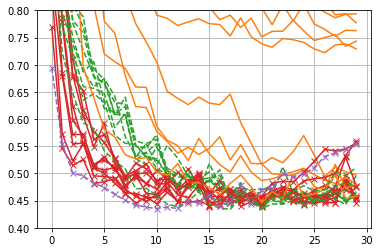

In [4]:
for i, loss_ratios in enumerate(all_loss_ratios):
    configs = torch.load(f'models/case_0/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')
#     plt.plot(np.mean([config['losses_snr'] for config in configs], axis=0), f'C{i}')
    plt.plot(np.mean([config['val_losses'] for config in configs], axis=0), f'C1')
    
    configs = torch.load(f'models/case_1/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')
    plt.plot(np.mean([config['val_losses'] for config in configs], axis=0), f'C2--')
    
    configs = torch.load(f'models/case_2/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')
    plt.plot(np.mean([config['val_losses'] for config in configs], axis=0), f'C3-x')
    
configs = torch.load(f'baselines/models/amc_baseline.pt')
# plt.plot(np.mean([config['losses'] for config in configs], axis=0), f'C3-x')
plt.plot(np.mean([config['val_losses'] for config in configs], axis=0), f'C4--x')
plt.ylim([0.4,0.8])
plt.grid()
# plt.legend(all_loss_ratios)

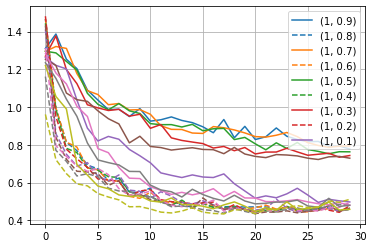

In [115]:
for i, loss_ratios in enumerate(all_loss_ratios):
    configs = torch.load(f'models/case_0/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')
#     plt.plot(np.mean([config['losses_snr'] for config in configs], axis=0), f'C{i}')
    plt.plot(np.mean([config['val_losses'] for config in configs], axis=0), f'C{i}')
    
    configs = torch.load(f'models/case_1/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')
    plt.plot(np.mean([config['val_losses'] for config in configs], axis=0), f'C{i}--')

# plt.ylim([0,2])
plt.grid()
plt.legend(all_loss_ratios)

In [26]:
all_loss_ratios = []
for i in range(1,10):
    models = []

    amc_weight = 1
    snr_weight = round(1 - i*0.1, 1)
    
    loss_ratios = (amc_weight, snr_weight)
    
    all_loss_ratios.append(loss_ratios)

In [25]:
all_loss_ratios

[(1, 0.9),
 (1, 0.8),
 (1, 0.7),
 (1, 0.6),
 (1, 0.5),
 (1, 0.4),
 (1, 0.3),
 (1, 0.2),
 (1, 0.1),
 'baseline']

In [7]:
temp_legend = all_loss_ratios
temp_legend.append('baseline')

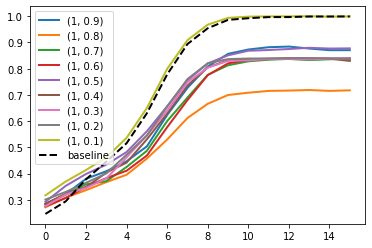

In [23]:
for ratio in all_loss_ratios:
    try:
        plt.plot(np.mean([result['accs_mod'] for result in torch.load(f'results/case_0/amc_1_{ratio[1]}.pt')], axis=0), linewidth=2)
    except:
        pass
plt.plot(np.mean([result['accs_mod'] for result in torch.load(f'baselines/results/amc_baseline.pt')[:5]], axis=0), 'k--', linewidth=2)
plt.legend(temp_legend)

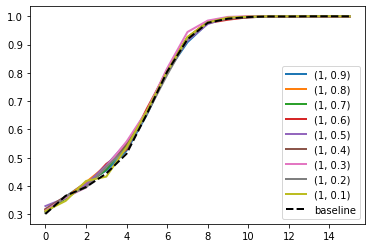

In [209]:
# for results in torch.load('results/case_0/amc_1_0.1.pt'):
#     plt.plot(results['accs_mod'], '--', linewidth=2)
# for result in torch.load(f'baselines/results/amc_baseline.pt'):
#     plt.plot(result['accs_mod'])
for ratio in all_loss_ratios:
    try:
        plt.plot(np.mean([result['accs_mod'] for result in torch.load(f'results/case_2/amc_1_{ratio[1]}.pt')], axis=0), linewidth=2)
    except:
        pass
plt.plot(np.mean([result['accs_mod'] for result in torch.load(f'baselines/results/amc_baseline.pt')[:5]], axis=0), 'k--', linewidth=2)
plt.legend(temp_legend)

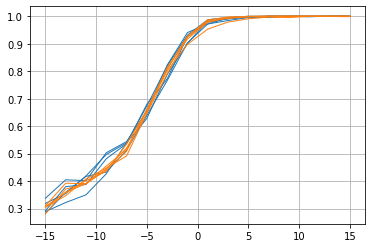

In [24]:
for results in torch.load('results/case_2/amc_1_0.2.pt'):
    plt.plot(np.arange(-15,16,2), results['accs_mod'], '-C0', linewidth=1)
for results in torch.load(f'baselines/results/amc_baseline.pt')[:5]:
    plt.plot(np.arange(-15,16,2), results['accs_mod'], '-C1', linewidth=1)
    
plt.grid()
# plt.plot(torch.load('results/case_0/amc_1_0.1.pt')[4]['accs_mod'])
# plt.plot(np.mean([result['accs_mod'] for result in torch.load(f'results/case_1/amc_1_0.2.pt')], axis=0), linewidth=2)
# plt.plot(np.mean([result['accs_mod'] for result in torch.load(f'baselines/results/amc_baseline.pt')], axis=0), 'k--', linewidth=2)
# plt.legend(all_loss_ratios)

In [12]:
def find_best_worst(results):
    best_acc = 0
    worst_acc = 100
    for idx, result in enumerate(results):
        mean_acc = np.mean(np.array(result['accs_mod']))
        if mean_acc < worst_acc:
            worst_acc = mean_acc
            worst_idx = idx
        if mean_acc > best_acc:
            best_acc = mean_acc
            best_idx = idx
    return best_idx, worst_idx

def calc_stats(path='results/amc_0.1_0.9.pt'):
    results = torch.load(path)
    best_idx, worst_idx = find_best_worst(results)
    # plt.plot(results[0]['cfos'], 1-np.array(ders_per_cfo_5))
    for idx, result in enumerate(results):
        if idx == best_idx:
            mean_fcn_best = np.mean(np.array(result['accs_mod']))
        if idx == worst_idx:
            mean_fcn_worst = np.mean(np.array(result['accs_mod']))
    mean_fcn = np.mean(np.array([result['accs_mod'] for result in results]).mean(axis=0))
    
    return mean_fcn_best, mean_fcn, mean_fcn_worst

In [13]:
titles = ['Linear SNR estimation', 'SNR estimation in dB', 'SNR estimation as classification']

In [16]:
baseline_best, baseline_mean, baseline_worst = \
calc_stats(path=f"baselines/results/amc_baseline.pt")

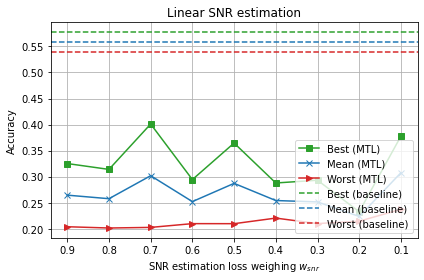

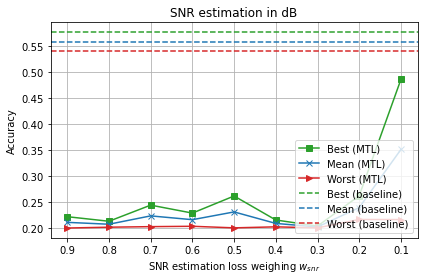

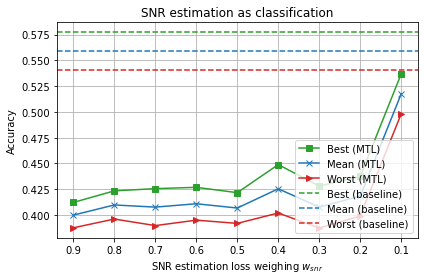

In [32]:
cases = [0, 1, 2]
for case in cases:
    bests, means, worsts = [], [], []

    for loss_ratios in all_loss_ratios:
        best, mean, worst = calc_stats(f'results/case_{case}/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')
        bests.append(best)
        means.append(mean)
        worsts.append(worst)

    baseline_best, baseline_mean, baseline_worst = \
    calc_stats(path=f"baselines/results/amc_baseline.pt")

    legend = [f'{loss_ratios[1]}' for loss_ratios in all_loss_ratios]

    plt.figure()
    plt.plot(np.array(bests), '-s', color='C2')
    plt.plot(np.array(means), '-x', color='C0')
    plt.plot(np.array(worsts), '->', color='C3')
    plt.axhline(y=baseline_best, color='C2', linestyle='--')
    plt.axhline(y=baseline_mean, color='C0', linestyle='--')
    plt.axhline(y=baseline_worst, color='C3', linestyle='--')
    plt.legend(['Best (MTL)', 'Mean (MTL)', 'Worst (MTL)', 'Best (baseline)', 'Mean (baseline)', 'Worst (baseline)'], loc='lower right')
    plt.xticks(np.arange(len(all_loss_ratios)), legend)
    plt.xlabel(r'SNR estimation loss weighing $w_{snr}$'); plt.ylabel('Accuracy')
    plt.title(titles[case])
    plt.grid()
#     plt.ylim([0.75, 0.8])
    plt.tight_layout()
#     plt.savefig(f'figures/mtl_results_case_{case}.png', dpi=300)

Test models

Analyze results

In [7]:
def find_best_worst(results):
    best_acc = 0
    worst_acc = 100
    for idx, result in enumerate(results):
        mean_acc = np.mean(np.array(result['accs_mod']))
        if mean_acc < worst_acc:
            worst_acc = mean_acc
            worst_idx = idx
        if mean_acc > best_acc:
            best_acc = mean_acc
            best_idx = idx
    return best_idx, worst_idx

In [8]:
results = torch.load('results/amc_0.1_0.9.pt')
best, worst = find_best_worst(results)

In [9]:
def calc_stats(path='results/amc_0.1_0.9.pt'):
    results = torch.load(path)
    best_idx, worst_idx = find_best_worst(results)
    # plt.plot(results[0]['cfos'], 1-np.array(ders_per_cfo_5))
    for idx, result in enumerate(results):
        if idx == best_idx:
            mean_fcn_best = np.mean(np.array(result['accs_mod']))
        if idx == worst_idx:
            mean_fcn_worst = np.mean(np.array(result['accs_mod']))
    mean_fcn = np.mean(np.array([result['accs_mod'] for result in results]).mean(axis=0))
    
    return mean_fcn_best, mean_fcn, mean_fcn_worst

In [42]:
all_loss_ratios = []
for i in range(1,10):
    models = []

    amc_weight = round(i*0.1, 1)
    snr_weight = round(1 - amc_weight, 1)
    
    loss_ratios = (amc_weight, snr_weight)
    
    all_loss_ratios.append(loss_ratios)

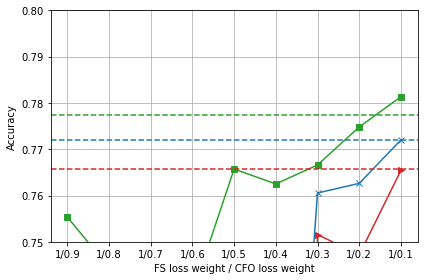

In [100]:
bests, means, worsts = [], [], []

for loss_ratios in all_loss_ratios:
    best, mean, worst = calc_stats(f'results/case_0/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')
    bests.append(best)
    means.append(mean)
    worsts.append(worst)

baseline_best, baseline_mean, baseline_worst = \
calc_stats(path=f"baselines/results/amc_baseline.pt")

legend = [f'{loss_ratios[0]}/{loss_ratios[1]}' for loss_ratios in all_loss_ratios]

plt.figure()
plt.plot(np.array(bests), '-s', color='C2')
plt.plot(np.array(means), '-x', color='C0')
plt.plot(np.array(worsts), '->', color='C3')
plt.axhline(y=baseline_best, color='C2', linestyle='--')
plt.axhline(y=baseline_mean, color='C0', linestyle='--')
plt.axhline(y=baseline_worst, color='C3', linestyle='--')
# plt.legend(['Best (MTL)', 'Mean (MTL)', 'Worst (MTL)', 'Best (baseline)', 'Mean (baseline)', 'Worst (baseline)'], loc='lower right')
plt.xticks(np.arange(len(all_loss_ratios)), legend)
plt.xlabel('FS loss weight / CFO loss weight'); plt.ylabel('Accuracy')
plt.grid()
plt.ylim([0.75, 0.8])
plt.tight_layout()

In [90]:
def plot_results(baseline_path='baseline/results/fs_baseline_0db.pt', result_path='results/fs_0.9_0.1_0db.pt', save=None):
    plt.figure()
    slices = -5
    results = torch.load(baseline_path)
    best_idx, worst_idx = find_best_worst(results)
    for idx, result in enumerate(results):
        if idx == best_idx:
            plt.plot(result['snr_range'][:slices], np.array(result['accs_mod'][:slices]), '-C0')
            mean_fcn_best = np.mean(np.array(result['accs_mod'][:slices]))
#         else:
#             plt.plot(result['snr_range'], np.array(result['accs_mod']), '-C0', alpha=0.2)
    plt.plot(result['snr_range'][:slices], np.array([result['accs_mod'][:slices] for result in results]).mean(axis=0), '--C0', linewidth=2)
    mean_fcn = np.mean(np.array([result['accs_mod'][:slices] for result in results]).mean(axis=0))
    
    results = torch.load(result_path)
    best_idx, worst_idx = find_best_worst(results)
    for idx, result in enumerate(results):
        if idx == best_idx:
            plt.plot(result['snr_range'][:slices], np.array(result['accs_mod'][:slices]), '-C3')
            mean_mtl_best = np.mean(np.array(result['accs_mod'][:slices]))
#         else:
#             plt.plot(result['snr_range'], np.array(result['accs_mod']), '-C3', alpha=0.2)
    
    plt.plot(result['snr_range'][:slices], np.array([result['accs_mod'][:slices] for result in results]).mean(axis=0), '--C3', linewidth=2)
    mean_mtl = np.mean(np.array([result['accs_mod'][:slices] for result in results]))

    custom_lines = [Line2D([0], [0], color='C0'),
                    Line2D([0], [0], color='C0', linestyle='--'),
                    Line2D([0], [0], color='C3'),
                    Line2D([0], [0], color='C3', linestyle='--')]

    plt.legend(custom_lines, [f'Best CNN ({mean_fcn_best:.3f})', 
                              f'Mean CNN  ({mean_fcn:.3f})', 
                              f'Best CNN+MTL ({mean_mtl_best:.3f})',
                              f'Mean CNN+MTL  ({mean_mtl:.3f})'])
    plt.grid()
    plt.xlabel('SNR, dB'); plt.ylabel('Accuracy')
    plt.title(f"AMC MTL accuracy comparison")
    plt.tight_layout()
    if save:
        plt.savefig(save, dpi=300, bbox_inches='tight')

0.676


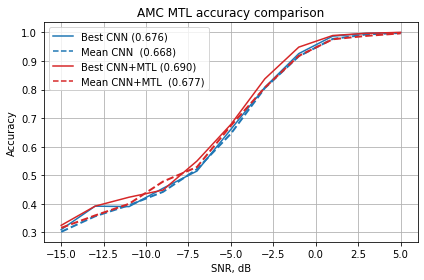

In [92]:
plot_results(baseline_path='baselines/results/amc_baseline.pt', result_path=f'results/case_2/amc_1_0.6.pt')

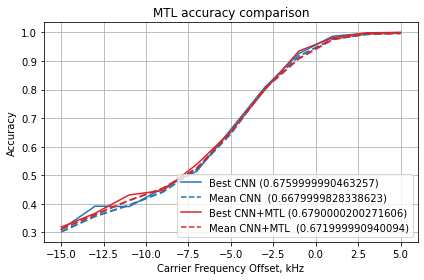

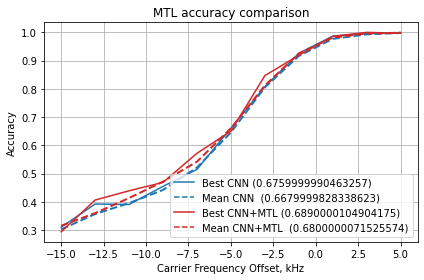

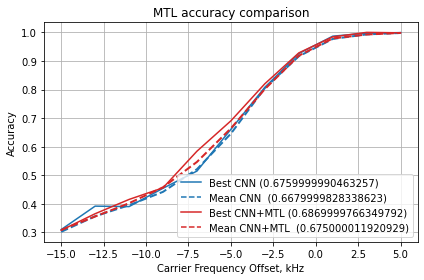

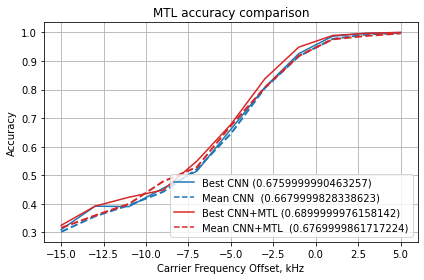

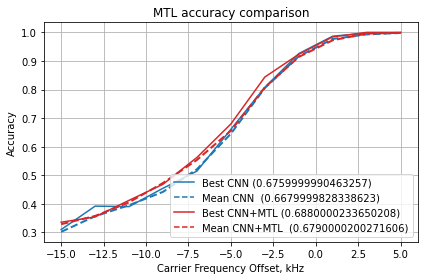

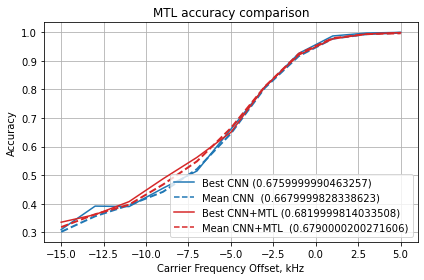

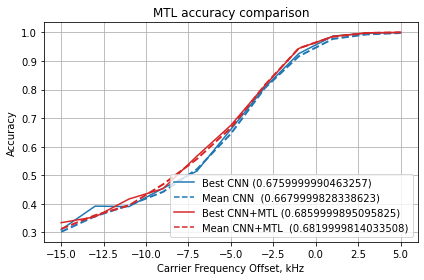

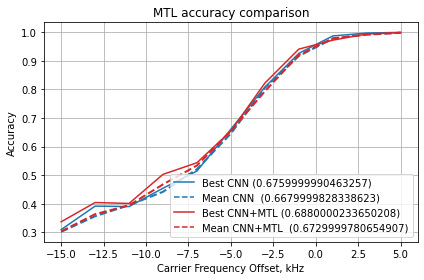

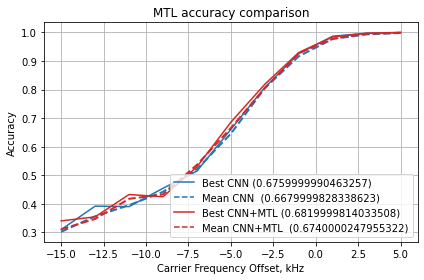

In [29]:
for loss_ratio in all_loss_ratios:
    plot_results(baseline_path='baselines/results/amc_baseline.pt', result_path=f'results/case_2/amc_{loss_ratio[0]}_{loss_ratio[1]}.pt')

In [33]:
all_loss_ratios

[(1, 0.9),
 (1, 0.8),
 (1, 0.7),
 (1, 0.6),
 (1, 0.5),
 (1, 0.4),
 (1, 0.3),
 (1, 0.2),
 (1, 0.1)]

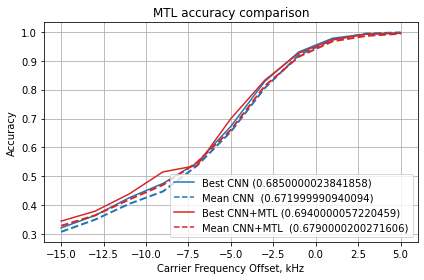

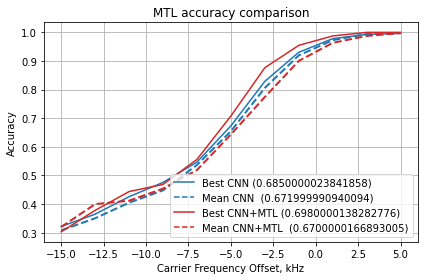

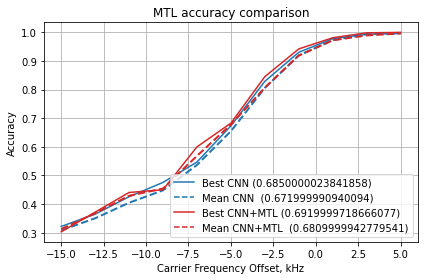

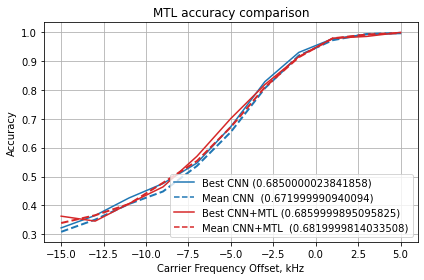

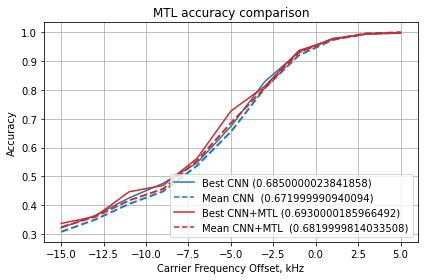

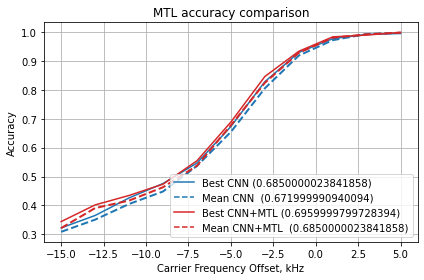

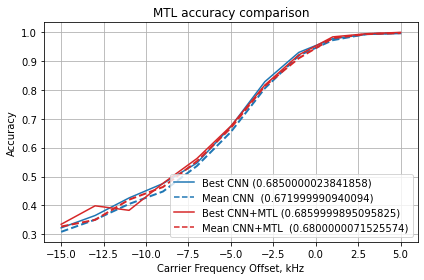

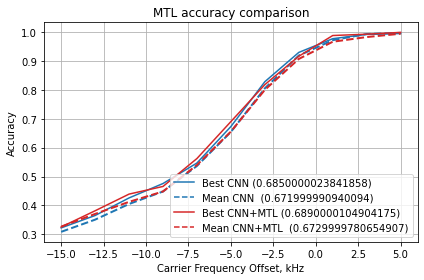

In [23]:
for loss_ratio in all_loss_ratios:
    plot_results(baseline_path='baselines/results/amc_baseline.pt', result_path=f'results/amc_{loss_ratio[0]}_{loss_ratio[1]}.pt')

In [100]:
def find_best_worst(results):
    best_acc = 0
    worst_acc = 100
    for idx, result in enumerate(results):
        mean_acc = np.mean(np.array(result['accs_mod']))
        if mean_acc < worst_acc:
            worst_acc = mean_acc
            worst_idx = idx
        if mean_acc > best_acc:
            best_acc = mean_acc
            best_idx = idx
    return best_idx, worst_idx

In [101]:
all_loss_ratios = []
for i in range(1,10):
    models = []

    amc_weight = 1
    snr_weight = round(1 - i*0.1, 1)
    
    loss_ratios = (amc_weight, snr_weight)
    
    all_loss_ratios.append(loss_ratios)

In [102]:
all_loss_ratios

[(1, 0.9),
 (1, 0.8),
 (1, 0.7),
 (1, 0.6),
 (1, 0.5),
 (1, 0.4),
 (1, 0.3),
 (1, 0.2),
 (1, 0.1)]

In [103]:
titles = ['Linear SNR estimation', 'SNR estimation in dB', 'SNR estimation as classification']

In [104]:
result.keys()

dict_keys(['accs_mod', 'snr_range', 'model'])

In [105]:
result['model'].keys()

dict_keys(['weights', 'losses', 'val_losses', 'losses_mod', 'losses_snr', 'val_losses_snr'])

In [106]:
import pandas as pd

In [107]:
test = pd.DataFrame(columns=['a', 'b'])

In [108]:
test.loc[0] = [1,2]

In [113]:
df = pd.DataFrame(columns=['weight0', 'weight1', 'best loss', 'best val loss', 'mean acc', 'best acc'])
for i, loss_ratios in enumerate(all_loss_ratios):
    results = torch.load(f'results/case_0/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')

    best_idx, _ = find_best_worst(results)

    best_loss = np.min([result['model']['losses'] for result in results])
    best_val_loss = np.min([result['model']['val_losses'] for result in results])
    
    best_acc = np.mean(results[best_idx]['accs_mod'])*100
    mean_acc = np.mean([result['accs_mod'] for result in results])*100
    
#     print('---')
#     print(best_loss)
#     print(best_val_loss, best_acc)
    
    df.loc[i] = [loss_ratios[0], loss_ratios[1], best_loss, best_val_loss, mean_acc, best_acc]
df['weight0'] = df['weight0'].astype(int)
df['weight1'] = df['weight1']
df['best loss'] = df['best loss'].map('{:,.3}'.format)
df['best val loss'] = df['best val loss'].map('{:,.3}'.format)
df['mean acc'] = df['mean acc'].map('{:,.4}'.format)
df['best acc'] = df['best acc'].map('{:,.4}'.format)

with open('tables/amc_snr_case0.tex', 'w') as f:
    latex = df.to_latex(index=False)
    f.write(latex)

df

,weight0,weight1,best loss,best val loss,mean acc,best acc
0,1,0.9,0.589,0.484,60.8,75.54
1,1,0.8,0.612,0.492,59.14,74.44
2,1,0.7,0.583,0.495,61.83,73.7
3,1,0.6,0.573,0.497,62.59,73.88
4,1,0.5,0.577,0.461,74.38,76.57
5,1,0.4,0.528,0.474,63.54,76.25
6,1,0.3,0.526,0.453,76.05,76.66
7,1,0.2,0.481,0.439,76.26,77.48
8,1,0.1,0.43,0.429,77.2,78.13


In [81]:
df = pd.DataFrame(columns=['weight0', 'weight1', 'best loss', 'best val loss', 'mean acc', 'best acc'])
for i, loss_ratios in enumerate(all_loss_ratios):
    results = torch.load(f'results/case_1/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')

    best_idx, _ = find_best_worst(results)

    best_loss = np.min([result['model']['losses'] for result in results])
    best_val_loss = np.min([result['model']['val_losses'] for result in results])
    
    best_acc = np.mean(results[best_idx]['accs_mod'])*100
    mean_acc = np.mean([result['accs_mod'] for result in results])*100
    
#     print('---')
#     print(best_loss)
#     print(best_val_loss, best_acc)
    
    df.loc[i] = [loss_ratios[0], loss_ratios[1], best_loss, best_val_loss, mean_acc, best_acc]
df['weight0'] = df['weight0'].astype(int)
df['weight1'] = df['weight1']
df['best loss'] = df['best loss'].map('{:,.3}'.format)
df['best val loss'] = df['best val loss'].map('{:,.3}'.format)
df['mean acc'] = df['mean acc'].map('{:,.4}'.format)
df['best acc'] = df['best acc'].map('{:,.4}'.format)

with open('tables/amc_snr_case1.tex', 'w') as f:
    latex = df.to_latex(index=False)
    f.write(latex)
    
df

,weight0,weight1,best loss,best val loss,mean acc,best acc
0,1,0.9,0.697,0.427,77.0,77.71
1,1,0.8,0.657,0.428,76.98,77.72
2,1,0.7,0.621,0.421,77.52,78.27
3,1,0.6,0.615,0.427,77.08,78.06
4,1,0.5,0.588,0.428,77.43,78.0
5,1,0.4,0.512,0.425,77.61,78.09
6,1,0.3,0.456,0.419,76.58,77.9
7,1,0.2,0.405,0.422,77.62,78.28
8,1,0.1,0.32,0.418,77.4,77.75


In [82]:
df = pd.DataFrame(columns=['weight0', 'weight1', 'best loss', 'best val loss', 'mean acc', 'best acc'])
for i, loss_ratios in enumerate(all_loss_ratios):
    results = torch.load(f'results/case_2/amc_{loss_ratios[0]}_{loss_ratios[1]}.pt')

    best_idx, _ = find_best_worst(results)

    best_loss = np.min([result['model']['losses'] for result in results])
    best_val_loss = np.min([result['model']['val_losses'] for result in results])
    
    best_acc = np.mean(results[best_idx]['accs_mod'])*100
    mean_acc = np.mean([result['accs_mod'] for result in results])*100
    
#     print('---')
#     print(best_loss)
#     print(best_val_loss, best_acc)
    
    df.loc[i] = [loss_ratios[0], loss_ratios[1], best_loss, best_val_loss, mean_acc, best_acc]
df['weight0'] = df['weight0'].astype(int)
df['weight1'] = df['weight1']
df['best loss'] = df['best loss'].map('{:,.3}'.format)
df['best val loss'] = df['best val loss'].map('{:,.3}'.format)
df['mean acc'] = df['mean acc'].map('{:,.4}'.format)
df['best acc'] = df['best acc'].map('{:,.4}'.format)

with open('tables/amc_snr_case2.tex', 'w') as f:
    latex = df.to_latex(index=False)
    f.write(latex)

df

,weight0,weight1,best loss,best val loss,mean acc,best acc
0,1,0.9,0.624,0.429,77.46,77.93
1,1,0.8,0.578,0.426,77.97,78.59
2,1,0.7,0.562,0.428,77.65,78.44
3,1,0.6,0.537,0.427,77.74,78.68
4,1,0.5,0.486,0.424,77.89,78.54
5,1,0.4,0.443,0.422,77.87,78.15
6,1,0.3,0.406,0.426,78.14,78.4
7,1,0.2,0.351,0.426,77.5,78.57
8,1,0.1,0.285,0.417,77.59,78.12


## FS+CFO

In [162]:
cfos = [10e3, 30e3]

In [138]:
results = torch.load(f'fcn/results/fs_ders_vs_snr_{loss_ratios[0]}_{loss_ratios[1]}_{cfos[0]}.pt')

In [139]:
results[0].keys()

dict_keys(['ders', 'model', 'cfo', 'snr_range'])

In [140]:
results[0]['model'].keys()

dict_keys(['weights', 'losses', 'val_losses', 'losses_fs', 'losses_cfo', 'accs', 'val_accs'])

In [141]:
def find_best_worst(results):
    best_acc = 0
    worst_acc = 100
    for idx, result in enumerate(results):
        mean_acc = np.mean(1-np.array(result['ders']))
        if mean_acc < worst_acc:
            worst_acc = mean_acc
            worst_idx = idx
        if mean_acc > best_acc:
            best_acc = mean_acc
            best_idx = idx
    return best_idx, worst_idx

In [142]:
find_best_worst(results)

(1, 2)

In [163]:
all_loss_ratios = []
for i in range(1,10):
    models = []

    amc_weight = 1
    snr_weight = round(1 - i*0.1, 1)
    
    loss_ratios = (amc_weight, snr_weight)
    
    all_loss_ratios.append(loss_ratios)

In [164]:
df = pd.DataFrame(columns=['weight0', 'weight1', 'best loss', 'best val loss', 'acc_10', 'acc_30'])
for i, loss_ratios in enumerate(all_loss_ratios):
    results = torch.load(f'fcn/results/fs_ders_vs_snr_{loss_ratios[0]}_{loss_ratios[1]}_{cfos[0]}.pt')

    best_loss = np.min([result['model']['losses'] for result in results])
    best_val_loss = np.min([result['model']['val_losses'] for result in results])
    
    accs = []
    for cfo in cfos:
        results = torch.load(f'fcn/results/fs_ders_vs_snr_{loss_ratios[0]}_{loss_ratios[1]}_{cfo}.pt')
        mean_acc = np.mean(1-np.array([result['ders'] for result in results]))*100
        accs.append(mean_acc)
    
    df.loc[i] = [loss_ratios[0], loss_ratios[1], best_loss, best_val_loss, *accs]
    
df['weight0'] = df['weight0'].astype(int)
df['weight1'] = df['weight1']
df['best loss'] = df['best loss'].map('{:,.3}'.format)
df['best val loss'] = df['best val loss'].map('{:,.3}'.format)
df['acc_10'] = df['acc_10'].map('{:,.4}'.format)
df['acc_30'] = df['acc_30'].map('{:,.4}'.format)

with open('tables/fs_cfo_fixed.tex', 'w') as f:
    latex = df.to_latex(index=False)
    f.write(latex)

df

,weight0,weight1,best loss,best val loss,acc_10,acc_30
0,1,0.9,0.00476,6.03e-05,79.71,78.39
1,1,0.8,0.00459,6.46e-05,79.85,78.37
2,1,0.7,0.00418,6.63e-05,79.81,78.36
3,1,0.6,0.0038,6.2e-05,80.25,78.98
4,1,0.5,0.0034,6.08e-05,80.2,79.46
5,1,0.4,0.00294,6.68e-05,80.15,78.51
6,1,0.3,0.00242,6.11e-05,80.09,79.06
7,1,0.2,0.00211,5.87e-05,80.95,79.74
8,1,0.1,0.00158,5.54e-06,81.18,79.76


In [165]:
all_loss_ratios = []
for i in range(1,10):
    models = []

    amc_weight = round(i*0.1, 1)
    snr_weight = round(1 - i*0.1, 1)
    
    loss_ratios = (amc_weight, snr_weight)
    
    all_loss_ratios.append(loss_ratios)

In [166]:
df = pd.DataFrame(columns=['weight0', 'weight1', 'best loss', 'best val loss', 'acc_10', 'acc_30'])
for i, loss_ratios in enumerate(all_loss_ratios):
    results = torch.load(f'fcn/results/fs_ders_vs_snr_{loss_ratios[0]}_{loss_ratios[1]}_{cfos[0]}.pt')

    best_loss = np.min([result['model']['losses'] for result in results])
    best_val_loss = np.min([result['model']['val_losses'] for result in results])
    
    accs = []
    for cfo in cfos:
        results = torch.load(f'fcn/results/fs_ders_vs_snr_{loss_ratios[0]}_{loss_ratios[1]}_{cfo}.pt')
        mean_acc = np.mean(1-np.array([result['ders'] for result in results]))*100
        accs.append(mean_acc)
    
    df.loc[i] = [loss_ratios[0], loss_ratios[1], best_loss, best_val_loss, *accs]
    
df['weight0'] = df['weight0']
df['weight1'] = df['weight1']
df['best loss'] = df['best loss'].map('{:,.3}'.format)
df['best val loss'] = df['best val loss'].map('{:,.3}'.format)
df['acc_10'] = df['acc_10'].map('{:,.4}'.format)
df['acc_30'] = df['acc_30'].map('{:,.4}'.format)

with open('tables/fs_cfo_varied.tex', 'w') as f:
    latex = df.to_latex(index=False)
    f.write(latex)

df

,weight0,weight1,best loss,best val loss,acc_10,acc_30
0,0.1,0.9,0.00438,0.000895,78.65,76.97
1,0.2,0.8,0.00418,0.000367,78.88,77.71
2,0.3,0.7,0.00377,0.000271,79.9,78.1
3,0.4,0.6,0.00358,0.000192,79.36,79.09
4,0.5,0.5,0.00321,0.000149,80.0,78.21
5,0.6,0.4,0.00274,0.000119,80.4,78.77
6,0.7,0.3,0.00236,0.000101,80.58,79.03
7,0.8,0.2,0.00208,7.04e-05,80.78,79.48
8,0.9,0.1,0.00897,5.66e-05,80.77,79.46


## FS + SNR

In [178]:
def find_best_worst(results):
    best_acc = 0
    worst_acc = 100
    for idx, result in enumerate(results):
        mean_acc = np.mean(np.array(result['accs']))
        if mean_acc < worst_acc:
            worst_acc = mean_acc
            worst_idx = idx
        if mean_acc > best_acc:
            best_acc = mean_acc
            best_idx = idx
    return best_idx, worst_idx

In [167]:
seq_lengths = [16,32,64]

In [197]:
all_loss_ratios = []
for i in range(1,10):
    models = []

    amc_weight = 1
    snr_weight = round(1 - i*0.1, 1)
    
    loss_ratios = (amc_weight, snr_weight)
    
    all_loss_ratios.append(loss_ratios)

In [170]:
seq_length = 64

In [173]:
results = torch.load(f'fcn/results/continuous/mtl_fs_snr_{loss_ratios[0]}_{loss_ratios[1]}_8192_{seq_length}.pt')

In [174]:
results[0].keys()

dict_keys(['accs', 'snr_range', 'model'])

In [177]:
results[0]['model'].keys()

dict_keys(['weights', 'losses', 'val_losses', 'snr_losses', 'fs_losses'])

In [199]:
j = 0
df = pd.DataFrame(columns=['seq_length', 'weight0', 'weight1', 'best loss', 'best val loss', 'mean acc', 'best acc'])
for seq_length in seq_lengths:
#     df = pd.DataFrame(columns=['seq_length', 'weight0', 'weight1', 'best loss', 'best val loss', 'mean acc', 'best acc'])
    for i, loss_ratios in enumerate(all_loss_ratios):
        results = torch.load(f'fcn/results/continuous/mtl_fs_snr_{loss_ratios[0]}_{loss_ratios[1]}_8192_{seq_length}.pt')

        best_idx, _ = find_best_worst(results)

        best_loss = np.min([result['model']['losses'] for result in results])
        best_val_loss = np.min([result['model']['val_losses'] for result in results])

        best_acc = np.mean(results[best_idx]['accs'])*100
        mean_acc = np.mean([result['accs'] for result in results])*100

        df.loc[j] = [seq_length, loss_ratios[0], loss_ratios[1], best_loss, best_val_loss, mean_acc, best_acc]
        j+=1
    
df['seq_length'] = df['seq_length'].astype(int)
df['weight0'] = df['weight0'].astype(int)
df['weight1'] = df['weight1']
df['best loss'] = df['best loss'].map('{:,.3}'.format)
df['best val loss'] = df['best val loss'].map('{:,.3}'.format)
df['mean acc'] = df['mean acc'].map('{:,.4}'.format)
df['best acc'] = df['best acc'].map('{:,.4}'.format)


with open('tables/fs_snr_fixed_weighting.tex', 'w') as f:
    latex = df.to_latex(index=False)
    f.write(latex)

# print(df)
# print()
df

,seq_length,weight0,weight1,best loss,best val loss,mean acc,best acc
0,16,1,0.9,0.00594,0.000409,50.9,54.09
1,16,1,0.8,0.00527,0.000407,52.68,53.75
2,16,1,0.7,0.00482,0.000397,52.02,53.92
3,16,1,0.6,0.00445,0.000406,53.29,54.12
4,16,1,0.5,0.00407,0.000403,53.5,54.21
5,16,1,0.4,0.00351,0.000405,53.69,54.28
6,16,1,0.3,0.00314,0.000397,54.24,54.48
7,16,1,0.2,0.00274,0.000395,54.29,54.6
8,16,1,0.1,0.00234,0.000397,54.19,54.51
9,32,1,0.9,0.00481,0.000111,71.12,71.48


In [200]:
all_loss_ratios = []
for i in range(1,10):
    models = []

    amc_weight = round(i*0.1, 1)
    snr_weight = round(1 - i*0.1, 1)
    
    loss_ratios = (amc_weight, snr_weight)
    
    all_loss_ratios.append(loss_ratios)

In [202]:
j = 0
df = pd.DataFrame(columns=['seq_length', 'weight0', 'weight1', 'best loss', 'best val loss', 'mean acc', 'best acc'])
for seq_length in seq_lengths:
#     df = pd.DataFrame(columns=['seq_length', 'weight0', 'weight1', 'best loss', 'best val loss', 'mean acc', 'best acc'])
    for i, loss_ratios in enumerate(all_loss_ratios):
        results = torch.load(f'fcn/results/continuous/mtl_fs_snr_{loss_ratios[0]}_{loss_ratios[1]}_8192_{seq_length}.pt')

        best_idx, _ = find_best_worst(results)

        best_loss = np.min([result['model']['losses'] for result in results])
        best_val_loss = np.min([result['model']['val_losses'] for result in results])

        best_acc = np.mean(results[best_idx]['accs'])*100
        mean_acc = np.mean([result['accs'] for result in results])*100

        df.loc[j] = [seq_length, loss_ratios[0], loss_ratios[1], best_loss, best_val_loss, mean_acc, best_acc]
        j+=1
    
df['seq_length'] = df['seq_length'].astype(int)
df['weight0'] = df['weight0']
df['weight1'] = df['weight1']
df['best loss'] = df['best loss'].map('{:,.3}'.format)
df['best val loss'] = df['best val loss'].map('{:,.3}'.format)
df['mean acc'] = df['mean acc'].map('{:,.4}'.format)
df['best acc'] = df['best acc'].map('{:,.4}'.format)


with open('tables/fs_snr_mixed_weighting.tex', 'w') as f:
    latex = df.to_latex(index=False)
    f.write(latex)

# print(df)
# print()
df

,seq_length,weight0,weight1,best loss,best val loss,mean acc,best acc
0,16,0.1,0.9,0.00432,0.00062,0.2723,0.3615
1,16,0.2,0.8,0.00423,0.000613,12.46,41.82
2,16,0.3,0.7,0.00391,0.000612,33.07,45.96
3,16,0.4,0.6,0.00368,0.000601,37.71,48.75
4,16,0.5,0.5,0.00355,0.000546,41.39,52.21
5,16,0.6,0.4,0.00315,0.000493,51.88,52.82
6,16,0.7,0.3,0.00289,0.000465,52.8,53.42
7,16,0.8,0.2,0.00255,0.000434,53.53,53.99
8,16,0.9,0.1,0.00223,0.000408,54.15,54.66
9,32,0.1,0.9,0.004,0.000609,1.682,5.992
